## Pandas Profiling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
data = pd.read_csv("D:\ineuron\DataSets\Dataset\data2\cleaned.csv")

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [7]:
data.shape

(1000, 10)

In [9]:
data.describe()

,math score,reading score,writing score,total score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [10]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average'],
      dtype='object')

In [11]:
data.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      81
reading score                   72
writing score                   77
total score                    194
average                        194
dtype: int64

In [14]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [15]:
#checking null values

In [16]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total score                    0
average                        0
dtype: int64

In [17]:
#dropping the redundant data

In [18]:
student = data.drop(['race/ethnicity' , 'parental level of education'], axis=1)

In [19]:
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,standard,none,72,72,74,218,72.666667
1,female,standard,completed,69,90,88,247,82.333333
2,female,standard,none,90,95,93,278,92.666667
3,male,free/reduced,none,47,57,44,148,49.333333
4,male,standard,none,76,78,75,229,76.333333


In [20]:
#outliers and relationship analysis

In [21]:
correlation = student.corr()

<AxesSubplot:>

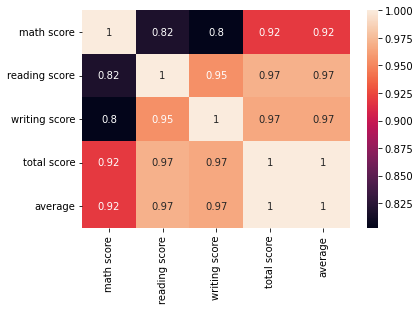

In [23]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels = correlation.columns, annot=True)

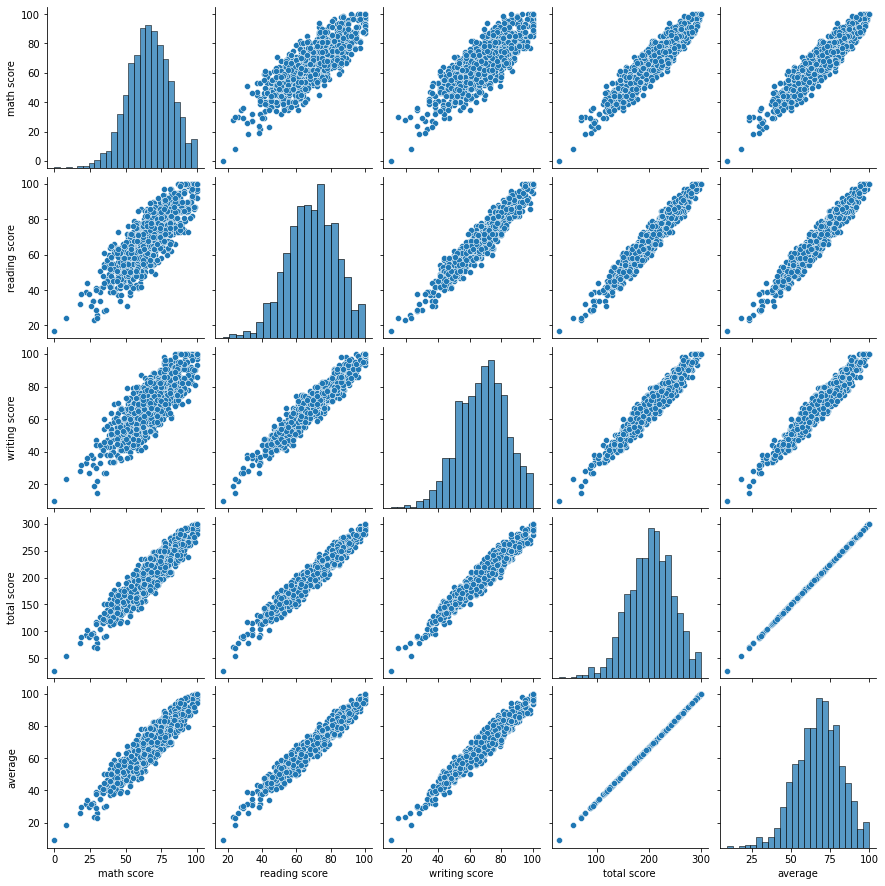

In [25]:
sns.pairplot(student)

In [26]:
#scatter plot

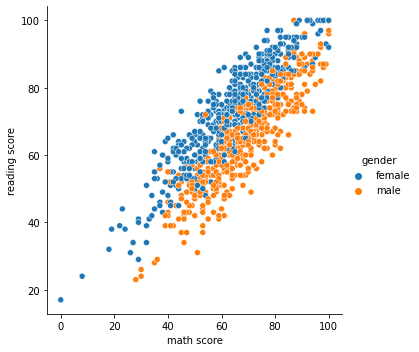

In [27]:
sns.relplot(x = 'math score', y = 'reading score', hue='gender', data = student )

In [28]:
#Histogram

D:\ineuron\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

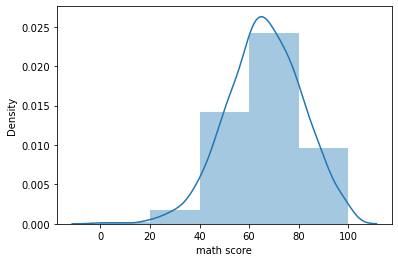

In [30]:
sns.distplot(student['math score'], bins=5)

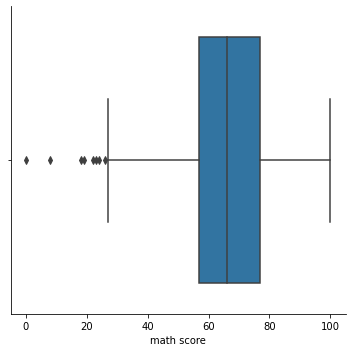

In [31]:
sns.catplot(x='math score',kind = 'box', data = student)

In [32]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.Collecting pandas-profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=eedb57de72f39f9ffc9d623f0f8a3e99b4404e25cc84441e86349b8c39ecac91
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [3]:
profile = ProfileReport(data, title = 'Pandas Profiling Report', explorative=True)

In [4]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
profile.to_file("output.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]